I'm now going to investigate how a classifier works on the data made in the other nb.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
X = np.load('blended_props.npy')
y = np.load('blended_bool.npy')

In [41]:
#X = X[:,:-1]
#X = X.reshape((-1, 1))

In [42]:
params2 = ['du','dg','dr','di','dz','dredshift', 'dist']
X2 = np.zeros((y.shape[0], len(params2)) )
X2[:, :-1] = np.abs(X[:, :len(params2)-1] - X[:, len(params2)-1:-1] )
X2[:, -1] = X[:, -1]

X = X2

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True)

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [75]:
#clf = clf.best_estimator_
clf = SVC(kernel='linear', C = 10)

In [76]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9677650429799427

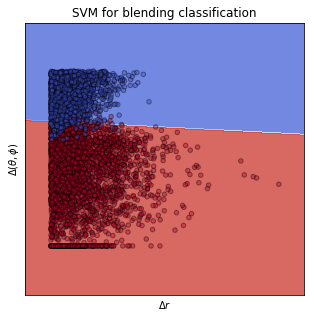

In [77]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy,  x_idx, y_idx, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    input = np.zeros((len(xx.ravel()), X.shape[1]))
    input[:, x_idx] = xx.ravel()
    input[:, y_idx] = yy.ravel()
    for idx in range(X.shape[1]):
        if idx == x_idx or idx == y_idx:
            continue
        input[:, idx] = X[1000, idx] # pick one

    Z = clf.predict(input)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

idx1, idx2 = 2, 6
X0, X1 = X[:, idx1], X[:, idx2]
xx, yy = make_meshgrid(X0, X1)

fig = plt.figure(figsize = (5,5))

plot_contours(plt, clf, xx, yy,idx1, idx2,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha = 0.4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(r'$\Delta r$')
plt.ylabel(r'$\Delta (\theta, \phi)$')

plt.title("SVM for blending classification")
plt.xticks(())
plt.yticks(())

plt.show()